# Capstone Project - IBM Data Science by Coursera

## Project: London Crime Rates

---

## Part 1 of 4: Preprocessing London Crime (Kaggle) data from 2008 to 2016

#### 1a) Installations

In [1042]:
%%capture

%pip install --upgrade pip
%pip install pandas
%pip install numpy

In [1119]:
print("Required libraries (for part 1 of 4) have been installed.")

Required libraries (for part 1 of 4) have been installed.


#### 1b) Imports

In [1124]:
# Read files and manipulate dataframes
import pandas as pd

# Math
import numpy as np

print("Required libraries (for part 1 of 4) have been imported.")

Required libraries (for part 1 of 4) have been imported.


#### 1c) Read London crime dataset

In [1045]:
london_crime_df = pd.read_csv('london_crime_by_lsoa.csv')

london_crime_df.tail(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5
13490603,E01003413,Merton,Violence Against the Person,Wounding/GBH,0,2015,6


#### 1d) Identify indexes of any "City of London" values. 
(they need to be removed since City of London is a division of greater London, not a borough)

In [1046]:
city_of_london_indexes = london_crime_df[london_crime_df['borough']=="City of London"].index.values

city_of_london_indexes

array([    1307,     1695,     4109, ..., 13487511, 13488364, 13490271],
      dtype=int64)

#### 1e) Remove all rows containing "City of London" values 

In [1047]:
london_crime_df.drop(city_of_london_indexes, inplace=True)
london_crime_df[london_crime_df['borough']=="City of London"].index.values

array([], dtype=int64)

#### 1f) Filter for most recent crime data (2016)

In [1048]:
# Remove all rows where the year is less than 2016
london_crime_df.drop(london_crime_df.index[london_crime_df['year'] < 2016], inplace = True)

# Remove any rows where number of crimes is 0
london_crime_df = london_crime_df[london_crime_df.value != 0]

# Reset index, and drop previous index
london_crime_df = london_crime_df.reset_index(drop=True)

london_crime_df.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8


#### 1g) Rename columns

In [1049]:
london_crime_df.columns = ['LSOA_Code', 'Borough','Major_Category','Minor_Category','Crimes','Year','Month']
london_crime_df.head()

,LSOA_Code,Borough,Major_Category,Minor_Category,Crimes,Year,Month
0,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
1,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
2,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
3,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
4,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11


#### 1h) Pivot table to view number of crimes for each major category in each borough

In [1050]:
london_crime_pivot = pd.pivot_table(london_crime_df, 
                              values  = ['Crimes'],
                              index   = ['Borough'],
                              columns = ['Major_Category'],
                              aggfunc = np.sum,fill_value=0,
                             )
london_crime_pivot.head(3)

Crimes                                                  \
Major_Category       Burglary Criminal Damage Drugs Other Notifiable Offences   
Borough                                                                         
Barking and Dagenham     1287            1949   919                       378   
Barnet                   3402            2183   906                       499   
Bexley                   1123            1673   646                       294   

                                                                             
Major_Category       Robbery Theft and Handling Violence Against the Person  
Borough                                                                      
Barking and Dagenham     534               5607                        6067  
Barnet                   464               9731                        7499  
Bexley                   209               4392                        4503

#### 1i) Reset index, and then add a total number of crimes per borough column

In [1051]:
# Reset the index
london_crime_pivot.reset_index(inplace = True)

# Total crimes per Borough
london_crime_pivot['Total_Crimes'] = london_crime_pivot.sum(axis=1)

london_crime_pivot.head(3)

Borough   Crimes                        \
Major_Category                       Burglary Criminal Damage Drugs   
0               Barking and Dagenham     1287            1949   919   
1                             Barnet     3402            2183   906   
2                             Bexley     1123            1673   646   

                                                                     \
Major_Category Other Notifiable Offences Robbery Theft and Handling   
0                                    378     534               5607   
1                                    499     464               9731   
2                                    294     209               4392   

                                           Total_Crimes  
Major_Category Violence Against the Person               
0                                     6067        16741  
1                                     7499        24684  
2                                     4503        12840

#### 1j) Remove multi-index in preparation for a dataframe merge

In [1052]:
london_crime_pivot.columns = london_crime_pivot.columns.map(''.join)

london_crime_pivot.head(3)

,Borough,CrimesBurglary,CrimesCriminal Damage,CrimesDrugs,CrimesOther Notifiable Offences,CrimesRobbery,CrimesTheft and Handling,CrimesViolence Against the Person,Total_Crimes
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840


#### 1k) Rename columns

In [1053]:
london_crime_pivot.columns = ['Borough',
                              'Burglaries',
                              'Criminal_Damage',
                              'Drugs',
                              'Other_Notifiable_Offences',
                              'Robberies',
                              'Theft_and_Handling',
                              'Violence_Against_the_Person',
                              'Total_Crimes',
                             ]
london_crime_pivot.head(3)

,Borough,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person,Total_Crimes
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741
1,Barnet,3402,2183,906,499,464,9731,7499,24684
2,Bexley,1123,1673,646,294,209,4392,4503,12840


---

## Part 2 of 4: Scraping London borough details from Wikipedia page 

#### 2a) Installations

In [1054]:
%%capture

%pip install --upgrade pip
%pip install bs4

In [1120]:
print("Required libraries (for part 2 of 4) have been installed.")

Required libraries (for part 2 of 4) have been installed.


#### 2b) Imports

In [1123]:
# Parsing HTML and XML documents
from bs4 import BeautifulSoup

# Handeling requests
import requests

print("Required libraries (for part 2 of 4) have been imported.")

Required libraries (for part 2 of 4) have been imported.


#### 2c) Scrape Wikipedia for London borough information

In [1057]:
wiki_url      = 'https://en.wikipedia.org/wiki/List_of_London_boroughs'
wiki_raw_page = requests.get(wiki_url).text

# Parse HTML/XML codes
soup = BeautifulSoup(wiki_raw_page,'xml')

#### 2d) Extract raw table from Wikipedia, and convert to dataframe

In [1058]:
wiki_raw_table = soup.find_all('table', {'class':'wikitable sortable'})

london_boroughs_df = pd.read_html(str(table[0]), index_col=None, header=0)[0]

london_boroughs_df.head(3)

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2013 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


#### 2e) Rename columns

In [1059]:
london_boroughs_df.columns = ['Borough',
                              'Inner',
                              'Status',
                              'Local_Authority',
                              'Political_Control',
                              'HQ',
                              'Area_Sq_Mi',
                              'Population_2013',
                              'Coordinates',
                              'Map_Ref_Num',
                             ]
london_boroughs_df.head(3)

,Borough,Inner,Status,Local_Authority,Political_Control,HQ,Area_Sq_Mi,Population_2013,Coordinates,Map_Ref_Num
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


#### 2f. Clean data - remove reference labels used by Wikipedia, and fill empty entries with NaN

In [1060]:
london_boroughs_df = london_boroughs_df.replace(' \[note 1\]', '', regex=True) 
london_boroughs_df = london_boroughs_df.replace(' \[note 2\]', '', regex=True) 
london_boroughs_df = london_boroughs_df.replace(' \[note 4\]', '', regex=True)

london_boroughs_df = london_boroughs_df.replace('\[note 3\]', 'NaN', regex=True)

london_boroughs_df.head(3)

,Borough,Inner,Status,Local_Authority,Political_Control,HQ,Area_Sq_Mi,Population_2013,Coordinates,Map_Ref_Num
0,Barking and Dagenham,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


#### 2g) Merge dataframes: London crime (Kaggle) and London boroughs (Wikipedia)

In [1061]:
london_merged_df = pd.merge(london_crime_pivot, london_boroughs_df, on='Borough')

london_merged_df.head(3)

,Borough,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person,Total_Crimes,Inner,Status,Local_Authority,Political_Control,HQ,Area_Sq_Mi,Population_2013,Coordinates,Map_Ref_Num
0,Barking and Dagenham,1287,1949,919,378,534,5607,6067,16741,NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,194352,51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E,25
1,Barnet,3402,2183,906,499,464,9731,7499,24684,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,369088,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


---

## Part 3 of 4: Exploratory Data Analysis

#### 3a) Installations

In [1062]:
%%capture

%pip install --upgrade pip
%pip install matplotlib

In [1121]:
print("Required libraries (for part 3 of 4) have been installed.")

Required libraries (for part 3 of 4) have been installed.


#### 3b) Imports

In [1122]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# Plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

print("Required libraries (for part 3 of 4) have been imported.")

Required libraries (for part 3 of 4) have been imported.


#### 3c) Display statistical calculations

In [1065]:
london_crime_pivot.describe()

,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person,Total_Crimes
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2133.843750,2002.156250,1215.750000,493.843750,703.875000,9187.625000,7261.125000,22998.218750
std,647.464988,527.590085,556.316863,209.824367,431.068496,4412.649798,2210.002011,8010.119055
min,879.000000,1051.000000,320.000000,189.000000,106.000000,3516.000000,3155.000000,9983.000000
25%,1717.750000,1667.250000,836.000000,380.250000,388.250000,6997.500000,6034.250000,18852.250000
50%,2093.000000,2062.500000,1074.500000,491.000000,600.500000,8975.500000,7454.000000,23204.500000
75%,2636.250000,2352.500000,1620.000000,566.500000,959.500000,10830.000000,8925.250000,27446.750000
max,3402.000000,3219.000000,2738.000000,1305.000000,1822.000000,27520.000000,10834.000000,48330.000000


#### 3d) Sort total crimes in descending order, and create new dataframe of top 5 highest-crime boroughs

In [1066]:
london_merged_df.sort_values(['Total_Crimes'], ascending = False, axis = 0, inplace = True )

london_crime_top5 = london_merged_df.head(5) 

london_crime_top5

,Borough,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person,Total_Crimes,Inner,Status,Local_Authority,Political_Control,HQ,Area_Sq_Mi,Population_2013,Coordinates,Map_Ref_Num
31,Westminster,3218,2179,2049,708,1822,27520,10834,48330,NaN,City,Westminster City Council,Conservative,"Westminster City Hall, 64 Victoria Street",8.29,226841,51°29′50″N 0°08′14″W﻿ / ﻿51.4973°N 0.1372°W,2
20,Lambeth,3087,2764,2738,635,1196,13155,10496,34071,NaN,NaN,Lambeth London Borough Council,Labour,"Lambeth Town Hall, Brixton Hill",10.36,314242,51°27′39″N 0°06′59″W﻿ / ﻿51.4607°N 0.1163°W,6
26,Southwark,2946,2621,1838,494,1317,12946,9474,31636,NaN,NaN,Southwark London Borough Council,Labour,160 Tooley Street,11.14,298464,51°30′13″N 0°04′49″W﻿ / ﻿51.5035°N 0.0804°W,7
23,Newham,2115,2496,1684,713,1472,11964,9646,30090,NaN,NaN,Newham London Borough Council,Labour,"Newham Dockside, 1000 Dockside Road",13.98,318227,51°30′28″N 0°02′49″E﻿ / ﻿51.5077°N 0.0469°E,27
28,Tower Hamlets,2794,2357,1629,678,1234,10953,9608,29253,NaN,NaN,Tower Hamlets London Borough Council,Labour,"Town Hall, Mulberry Place, 5 Clove Crescent",7.63,272890,51°30′36″N 0°00′21″W﻿ / ﻿51.5099°N 0.0059°W,8


#### 3e) Filter for borough and top 5 highest total number of crimes

In [1067]:
london_crime_top5_total = london_crime_top5[['Borough','Total_Crimes']]

# Set borough as index
london_crime_top5_total.set_index('Borough', inplace = True)

london_crime_top5_total

,Total_Crimes
Borough,
Westminster,48330
Lambeth,34071
Southwark,31636
Newham,30090
Tower Hamlets,29253


#### 3f) Create function that displays number of crimes on top of bars in bargraph

In [1068]:
def numOnBars():
    for p in ax.patches:
        ax.annotate(np.round(p.get_height(), decimals=2), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha         = 'center', 
                    va         = 'center', 
                    xytext     = (0, 10), 
                    textcoords ='offset points',
                    fontsize   = 14,
                   )

#### 3g) Bargraph: Top 5, highest-crime boroughs in London

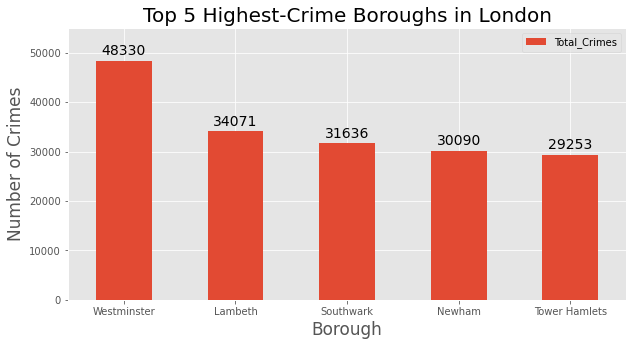

In [1069]:
ax = london_crime_top5_total.plot(kind='bar', figsize=(10, 5), rot=0)

ax.set_xlabel('Borough', size=17)
ax.set_ylabel('Number of Crimes', size=17)
ax.set_ylim(0, 55000)
ax.set_title('Top 5 Highest-Crime Boroughs in London', size=20)

numOnBars()

plt.show()

#### 3h) Sort total crimes in ascending order, and create new dataframe of bottom 5 lowest-crime boroughs

In [1070]:
london_merged_df.sort_values(['Total_Crimes'], ascending = True, axis = 0, inplace = True )

london_crime_bottom5 = london_merged_df.head() 

london_crime_bottom5

,Borough,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person,Total_Crimes,Inner,Status,Local_Authority,Political_Control,HQ,Area_Sq_Mi,Population_2013,Coordinates,Map_Ref_Num
19,Kingston upon Thames,879,1054,743,189,121,3803,3194,9983,NaN,Royal,Kingston upon Thames London Borough Council,Liberal Democrat,"Guildhall, High Street",14.38,166793,51°24′31″N 0°18′23″W﻿ / ﻿51.4085°N 0.3064°W,16
27,Sutton,1233,1316,461,253,165,3516,3714,10658,NaN,NaN,Sutton London Borough Council,Liberal Democrat,"Civic Offices, St Nicholas Way",16.93,195914,51°21′42″N 0°11′40″W﻿ / ﻿51.3618°N 0.1945°W,18
25,Richmond upon Thames,1359,1148,320,217,106,4769,3155,11074,NaN,NaN,Richmond upon Thames London Borough Council,Liberal Democrat,"Civic Centre, 44 York Street",22.17,191365,51°26′52″N 0°19′34″W﻿ / ﻿51.4479°N 0.3260°W,15
22,Merton,1419,1418,466,249,283,4894,4026,12755,NaN,NaN,Merton London Borough Council,Labour,"Civic Centre, London Road",14.52,203223,51°24′05″N 0°11′45″W﻿ / ﻿51.4014°N 0.1958°W,17
2,Bexley,1123,1673,646,294,209,4392,4503,12840,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,236687,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23


#### 3i) Filter for borough and bottom 5 lowest total number of crimes

In [1071]:
london_crime_bottom5_total = london_crime_bottom5[['Borough','Total_Crimes']]

london_crime_bottom5_total.set_index('Borough', inplace = True)

london_crime_bottom5_total

,Total_Crimes
Borough,
Kingston upon Thames,9983
Sutton,10658
Richmond upon Thames,11074
Merton,12755
Bexley,12840


#### 3j) Bargraph: Bottom 5, lowest-crime boroughs in London

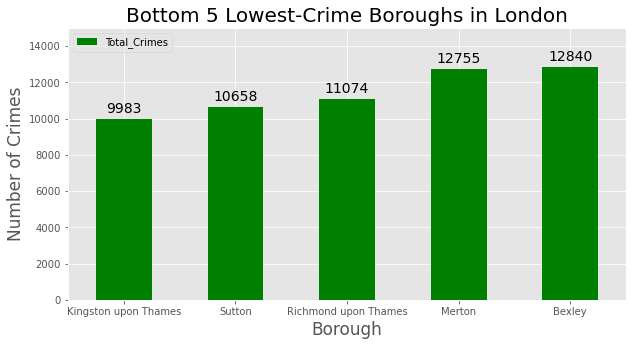

In [1072]:
ax = london_crime_bottom5_total.plot(kind='bar', figsize=(10, 5), rot=0, color='g')

ax.set_xlabel('Borough', size=17)
ax.set_ylabel('Number of Crimes', size=17)
ax.set_ylim(0, 15000)
ax.set_title('Bottom 5 Lowest-Crime Boroughs in London', size=20)

ax.legend(loc='upper left')

numOnBars()

plt.show()

#### 3k) Filter for lowest-crime borough, 'Kingston upon Thames'

In [1073]:
london_crime_bottom1 =  london_crime_bottom5[london_crime_bottom5['Borough'] == 'Kingston upon Thames']

london_crime_bottom1 = london_crime_bottom1[['Borough',
                              'Burglaries',
                              'Criminal_Damage',
                              'Drugs',
                              'Other_Notifiable_Offences',
                              'Robberies',
                              'Theft_and_Handling',
                              'Violence_Against_the_Person',
                             ]]

london_crime_bottom1.set_index('Borough', inplace = True)

london_crime_bottom1.head()

,Burglaries,Criminal_Damage,Drugs,Other_Notifiable_Offences,Robberies,Theft_and_Handling,Violence_Against_the_Person
Borough,,,,,,,
Kingston upon Thames,879,1054,743,189,121,3803,3194


#### 3l) Bargraph: Types of crimes that occur in the lowest-crime borough

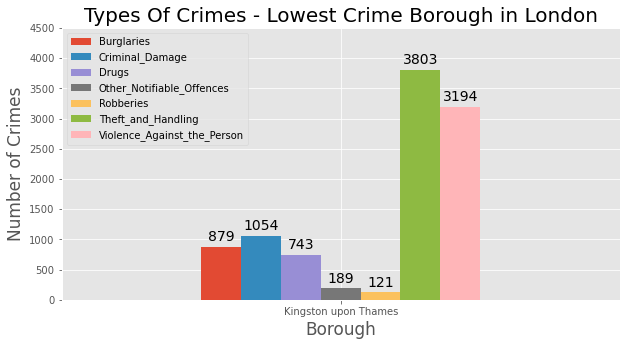

In [1074]:
ax = df_bc.plot(kind='bar', figsize=(10, 5), rot=0)

ax.set_ylabel('Number of Crimes', size=17)
ax.set_xlabel('Borough', size=17)
ax.set_title('Types Of Crimes - Lowest Crime Borough in London', size=20)

ax.set_ylim(0, 4500)

numOnBars()

plt.show()


---

## Part 4 of 4: Modelling clusters

#### 4a) Installations

In [1127]:
%%capture

%pip install --upgrade pip
%pip install geopy
%pip install sklearn
%pip install folium

In [1128]:
print("Required libraries (for part 4 of 4) have been installed.")

Required libraries (for part 4 of 4) have been installed.


#### 4b) Imports

In [1129]:
# Convert addresses into latitude & longitude values
from geopy.geocoders import Nominatim

# Clustering
from sklearn.cluster import KMeans

# Rendering maps
import folium

print("Required libraries (for part 4 of 4) have been imported.")

Required libraries (for part 4 of 4) have been imported.


#### 4c) Create dataframe for neighbourhoods in 'Kingston upon Thames' borough, including longitude & latitude

Kingston upon Thames neighbourhoods:<br>
https://en.wikipedia.org/wiki/List_of_districts_in_the_Royal_Borough_of_Kingston_upon_Thames

In [1078]:
# Define neighbourhoods to be added to the dataframe
kingston_hoods = ['Berrylands',
                  'Canbury',
                  'Chessington',
                  'Coombe',
                  'Hook',
                  'Kingston upon Thames',
                  'Kingston Vale',
                  'Malden Rushett',
                  'Motspur Park',
                  'New Malden',
                  'Norbiton',
                  'Old Malden',
                  'Seething Wells',
                  'Surbiton',
                  'Tolworth',
                 ]

# Define repeated borough to be added to the dataframe
borough = ['Kingston upon Thames'] * 15

# Get latitudes & longitudes to be added to the dataframe
latitudes = []
longitudes = []

for i in range(len(kingston_hoods)):
    address = '{},London,United Kingdom'.format(kingston_hoods[i])
    geolocator = Nominatim(user_agent="London_agent")
    location = geolocator.geocode(address)
    latitudes.append(location.latitude)
    longitudes.append(location.longitude)

# Collect data
kingston_hood_data = {'Neighbourhood': kingston_hoods, 
                      'Borough'     : borough, 
                      'Latitude'    : latitudes, 
                      'Longitude'   : longitudes,
                     }

# Create dataframe
kingston_hoods_df = pd.DataFrame(data=kingston_hood_data, 
                                 columns=['Neighbourhood', 
                                          'Borough', 
                                          'Latitude', 
                                          'Longitude'], 
                                 index=None
                                )
kingston_hoods_df

,Neighbourhood,Borough,Latitude,Longitude
0,Berrylands,Kingston upon Thames,51.393781,-0.284802
1,Canbury,Kingston upon Thames,51.417499,-0.305553
2,Chessington,Kingston upon Thames,51.358336,-0.298622
3,Coombe,Kingston upon Thames,51.419450,-0.265398
4,Hook,Kingston upon Thames,51.367898,-0.307145
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898
9,New Malden,Kingston upon Thames,51.405335,-0.263407


#### 4d) Define Foursquare credentials and version
(this section requires a Foursquare account)

In [1079]:
CLIENT_ID     = 'BCFGDA4NNPKQUE15CQ20UDIBLGVBPI3YSTQSCZQLUEMIHYUH'
CLIENT_SECRET = 'QQNSQNVQFXYE0AVDI1DEMZ0M1PRUTJNQZGYHYFLHQCFJMJD4'

VERSION = '20180605'
LIMIT   = 30

#### 4e) Create function to extract venues from each neighbourhood within 500 meter radius

In [1080]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list = []
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Create API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'\
        .format(CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT,
               )
            
        # GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Return only relevant information for each nearby venue
        venues_list.append([(name, 
                             lat, 
                             lng, 
                             v['venue']['name'], 
                             v['venue']['location']['lat'], 
                             v['venue']['location']['lng'],  
                             v['venue']['categories'][0]['name']
                            ) for v in results
                           ]
                          )

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                             'Neighbourhood_Latitude', 
                             'Neighbourhood_Longitude', 
                             'Venue', 
                             'Venue_Latitude', 
                             'Venue_Longitude', 
                             'Venue_Category',
                            ]
    return(nearby_venues)

#### 4f) Find nearby venues

In [1081]:
kingston_venues = getNearbyVenues(names=kingston_hoods_df['Neighbourhood'],
                                  latitudes=kingston_hoods_df['Latitude'],
                                  longitudes=kingston_hoods_df['Longitude'],
                                 )

kingston_venues.groupby('Neighbourhood').count().head(3)

Berrylands
Canbury
Chessington
Coombe
Hook
Kingston upon Thames
Kingston Vale
Malden Rushett
Motspur Park
New Malden
Norbiton
Old Malden
Seething Wells
Surbiton
Tolworth


,Neighbourhood_Latitude,Neighbourhood_Longitude,Venue,Venue_Latitude,Venue_Longitude,Venue_Category
Neighbourhood,,,,,,
Berrylands,3,3,3,3,3,3
Canbury,13,13,13,13,13,13
Coombe,1,1,1,1,1,1


#### 4g) One hot encoding

In [1082]:
kingston_onehot = pd.get_dummies(kingston_venues[['Venue_Category']], prefix="", prefix_sep="")

# Add neighbourhood column to dataframe
kingston_onehot['Neighbourhood'] = kingston_venues['Neighbourhood'] 

# Shift neighbourhood column to first column
fixed_columns   = [kingston_onehot.columns[-1]] + list(kingston_onehot.columns[:-1])
kingston_onehot = kingston_onehot[fixed_columns]

kingston_onehot.head(3)

,Neighbourhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Berrylands,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 4h) Calculate mean frequency of occurrence for each category, and group rows by neighbourhood

In [1083]:
kingston_grouped = kingston_onehot.groupby('Neighbourhood').mean().reset_index()
kingston_grouped.head(3)

,Neighbourhood,Asian Restaurant,Auto Garage,Bagel Shop,Bakery,Bar,Beer Bar,Bistro,Bookstore,Bowling Alley,...,Shop & Service,Soccer Field,Spa,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Train Station,Wine Shop
0,Berrylands,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,Canbury,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.076923,0.0,0.076923,0.076923,0.0,0.0,0.0,0.0,0.0,0.0
2,Coombe,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


#### 4i. Create function to sort venues in decending order

In [1084]:
def sortTopVenues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### 4j) Explore top 10 venues within each neighbourhood

In [1085]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# Create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighbourhood'] = kingston_grouped['Neighbourhood']

for ind in np.arange(kut_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = sortTopVenues(kut_grouped.iloc[ind, :], num_top_venues)

venues_sorted.head(3)

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Berrylands,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Fish & Chips Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Food
1,Canbury,Pub,Café,Plaza,Supermarket,Spa,Fish & Chips Shop,Shop & Service,Park,Hotel,Indian Restaurant
2,Coombe,Health & Beauty Service,Wine Shop,Food,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant


#### 4k) Use k-means to create 5 seperate clusters of  similar 'Kingston upon Thames' neighbourhoods

In [1097]:
k_clusters = 5

# Drop neightbourhood column
kingston_grouped_cluster = kingston_grouped.drop('Neighbourhood', 1)

# run k-means clustering
k_means = KMeans(n_clusters=k_clusters, random_state=0).fit(kingston_grouped_cluster)

# Add clustering labels
venues_sorted["Cluster_Labels"] = k_means.labels_

# Create new dataframe to include cluster & top 10 venues
kingston_cluster_top_venues = kingston_hoods_df

# Merge dataframes to add latitude & longitude columns
kingston_cluster_top_venues = kingston_cluster_top_venues.join(venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

# Sort by cluster labels
kingston_cluster_top_venues.sort_values(["Cluster_Labels"], inplace=True)

kingston_cluster_top_venues.head(3)

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,Grocery Store,Sandwich Place,Bar,Soccer Field,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,0.0,0.0
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,0.0,0.0
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,Gym,Park,Restaurant,Soccer Field,Fish & Chips Shop,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,0.0,0.0


#### 4l) Drop row with NaN value, and change the Cluster Label type from float64 to int32

In [1106]:
kingston_cluster_top_venues.dropna(inplace = True)

kingston_cluster_top_venues['Cluster Labels'] = kingston_cluster_top_venues['Cluster Labels'].astype(int)

#### 4m) Visualize clusters

In [1113]:
# Create figure
fig = folium.Figure(width=900, height=300)

# Create map
map = folium.Map(location=[latitude, longitude], zoom_start=11.2)

x  = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]

# Set color scheme for clusters
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow      = [colors.rgb2hex(i) for i in colors_array]

# Add markers to the map
markers_colors = []

for lat, lon, hood, cluster in zip(kingston_cluster_top_venues['Latitude'], 
                                   kingston_cluster_top_venues['Longitude'], 
                                   kingston_cluster_top_venues['Neighbourhood'], 
                                   kingston_cluster_top_venues['Cluster Labels']
                                  ):
    
    label = folium.Popup(str(hood) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker([lat, lon],
                        radius       = 8,
                        popup        = label,
                        color        = rainbow[cluster-1],
                        fill         = True,
                        fill_color   = rainbow[cluster-1],
                        fill_opacity = 0.5,
                       ).add_to(map)
    
map_clusters = fig.add_child(map)

map_clusters

---

## Analysis: See characteristics of each cluster to determine neighbourhood suitability

In [1114]:
kingston_cluster_top_venues[kingston_cluster_top_venues['Cluster_Labels'] == 0]

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
6,Kingston Vale,Kingston upon Thames,51.431850,-0.258138,Grocery Store,Sandwich Place,Bar,Soccer Field,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,0,0
7,Malden Rushett,Kingston upon Thames,51.341052,-0.319076,Grocery Store,Pub,Garden Center,Restaurant,Fish & Chips Shop,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,0,0
8,Motspur Park,Kingston upon Thames,51.390985,-0.248898,Gym,Park,Restaurant,Soccer Field,Fish & Chips Shop,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,0,0
14,Tolworth,Kingston upon Thames,51.378876,-0.282860,Grocery Store,Pharmacy,Pizza Place,Bowling Alley,Coffee Shop,Indian Restaurant,Café,Bus Stop,Hotel,Sandwich Place,0,0


In [1115]:
kingston_cluster_top_venues[kingston_cluster_top_venues['Cluster_Labels'] == 1]

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
3,Coombe,Kingston upon Thames,51.41945,-0.265398,Health & Beauty Service,Wine Shop,Food,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,French Restaurant,1,1


In [1116]:
kingston_cluster_top_venues[kingston_cluster_top_venues['Cluster_Labels'] == 2]

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
11,Old Malden,Kingston upon Thames,51.382484,-0.25909,Train Station,Pub,Food,German Restaurant,Gastropub,Garden Center,Furniture / Home Store,Fried Chicken Joint,French Restaurant,Deli / Bodega,2,2


In [1117]:
kingston_cluster_top_venues[kingston_cluster_top_venues['Cluster_Labels'] == 3]

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
1,Canbury,Kingston upon Thames,51.417499,-0.305553,Pub,Café,Plaza,Supermarket,Spa,Fish & Chips Shop,Shop & Service,Park,Hotel,Indian Restaurant,3,3
4,Hook,Kingston upon Thames,51.367898,-0.307145,Indian Restaurant,Bakery,Supermarket,Fish & Chips Shop,Food,Discount Store,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,3,3
5,Kingston upon Thames,Kingston upon Thames,51.409627,-0.306262,Café,Pub,Sushi Restaurant,Coffee Shop,Burger Joint,German Restaurant,Gift Shop,French Restaurant,Electronics Store,Department Store,3,3
9,New Malden,Kingston upon Thames,51.405335,-0.263407,Gym,Gastropub,Sushi Restaurant,Supermarket,Bar,Korean Restaurant,Indian Restaurant,Fast Food Restaurant,Discount Store,Dry Cleaner,3,3
10,Norbiton,Kingston upon Thames,51.409999,-0.287396,Platform,Food,Indian Restaurant,Italian Restaurant,Pub,Wine Shop,Farmers Market,Grocery Store,Dry Cleaner,Hardware Store,3,3
12,Seething Wells,Kingston upon Thames,51.392642,-0.314366,Indian Restaurant,Coffee Shop,Pub,Café,Fast Food Restaurant,Playground,Chinese Restaurant,Italian Restaurant,Restaurant,Gym,3,3
13,Surbiton,Kingston upon Thames,51.393756,-0.303310,Coffee Shop,Pub,Grocery Store,Italian Restaurant,Pharmacy,Breakfast Spot,French Restaurant,Train Station,Gym / Fitness Center,Hotel,3,3


In [1118]:
kingston_cluster_top_venues[kingston_cluster_top_venues['Cluster_Labels'] == 4]

,Neighbourhood,Borough,Latitude,Longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Cluster Labels,Cluster_Labels
0,Berrylands,Kingston upon Thames,51.393781,-0.284802,Gym / Fitness Center,Park,Bus Stop,Wine Shop,Fish & Chips Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Food,4,4
